In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
import os
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, log_loss
from yellowbrick.regressor import ResidualsPlot
os.environ['TF_DETERMINISTIC_OPS'] = '1'
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interp
from matplotlib import pyplot 
from yellowbrick.classifier import ClassificationReport
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from xgboost import XGBClassifier
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTENC,SMOTE
import tensorflow as tf
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
data_0 = pd.read_csv('/home/sameerahtalafha/new_project/new/tables/DRUGDAYS-original.csv') #/home/sameerahtalafha/new_project/new/tables/DAST-original.csv

# ,'SEX','RACE',
#                     'HISPANIC', 'VET', 'ACTIVE', 'DEPLOY', 'COSCREEN','ALCDRUGS', 'DAYSCOCAINE', 'MARYJDAYS',
#                      'METHDAYS', 'AGE', 'ANYALC','BINGEDAYS'

# #'BIRTH','SCREEN','OTHERDRUGS','METHADONE','ANYOPIATEDAYS','HALLUC',
data_0=data_0.drop(['METHDAYS'],axis=1)
data_0=data_0.dropna()
#data_0.columns.str.strip()
data_0.columns
df=data_0.copy()

df=df.sample(frac=1)
# bins= [15,21,35,45,60,100]
# labels = [0,1,2,3,4]
# df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# bins= [0,1,10,20,31]
# labels = [0,1,2,3]
# df['DRUGDAYS'] = pd.cut(df['DRUGDAYS'], bins=bins, labels=labels, right=False)

df.columns

Index(['DRUGDAYS', 'DAST', 'SEX', 'HISPANIC', 'RACE', 'VET', 'ACTIVE',
       'DEPLOY', 'AUDIT', 'COSCREEN', 'BI', 'BT', 'RT', 'ANYALC', 'BINGEDAYS',
       'ALCDRUGS', 'DAYSCOCAINE', 'MARYJDAYS', 'INJECT', 'AGE', 'TOBMONTH'],
      dtype='object')

In [13]:
def aply_oonehot(df, col):
    df_en = pd.get_dummies(df[col])
    
    df_en = df_en.drop(df_en.columns[0], 1)
    
    cols = [str(col)+'_'+str(c) for c in df_en.columns]
    df_en.columns = cols
    
    df = df.drop(col, 1)
    
    
    df = pd.concat([df, df_en], axis=1)
    return df


In [14]:
df['DAST'] = df['DAST'].astype(float).astype(int)
df['SEX'] = df['SEX'].astype(float).astype(int)
df['HISPANIC'] = df['HISPANIC'].astype(float).astype(int)
df['RACE'] = df['RACE'].astype(float).astype(int)
df['VET'] = df['VET'].astype(float).astype(int)
df['ACTIVE'] = df['ACTIVE'].astype(float).astype(int)
df['DEPLOY'] = df['DEPLOY'].astype(float).astype(int)
df['AUDIT'] = df['AUDIT'].astype(float).astype(int)
df['COSCREEN'] = df['COSCREEN'].astype(float).astype(int)
df['RT'] = df['RT'].astype(float).astype(int)
df['BI'] = df['BI'].astype(float).astype(int)
df['BT'] = df['BT'].astype(float).astype(int)
df['INJECT'] = df['INJECT'].astype(float).astype(int)
df['TOBMONTH'] = df['TOBMONTH'].astype(float).astype(int)
#############################################################
df['ANYALC'] = df['ANYALC'].astype(float).astype(int)
df['BINGEDAYS'] = df['BINGEDAYS'].astype(float).astype(int)
df['DRUGDAYS'] = df['DRUGDAYS'].astype(float).astype(int)
df['ALCDRUGS'] = df['ALCDRUGS'].astype(float).astype(int)
df['DAYSCOCAINE'] = df['DAYSCOCAINE'].astype(float).astype(int)
df['MARYJDAYS'] = df['MARYJDAYS'].astype(float).astype(int)
# df['METHDAYS'] = df['METHDAYS'].astype(float).astype(int)
df['AGE'] = df['AGE'].astype(float).astype(int)
df

,DRUGDAYS,DAST,SEX,HISPANIC,RACE,VET,ACTIVE,DEPLOY,AUDIT,COSCREEN,...,BT,RT,ANYALC,BINGEDAYS,ALCDRUGS,DAYSCOCAINE,MARYJDAYS,INJECT,AGE,TOBMONTH
14696,3,1,1,0,2,0,0,0,0,0,...,0,0,7,0,4,0,0,0,38,0
13531,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,20,0
493,0,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
108,1,1,1,0,2,0,0,0,2,0,...,0,0,11,2,2,0,2,0,61,0
10234,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,73,0
10220,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,74,0
14326,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,1
10217,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,63,0


In [15]:
train,test=train_test_split(df, test_size=.25)

train = aply_oonehot(train, 'COSCREEN')
test =  aply_oonehot(test, 'COSCREEN')

train = aply_oonehot(train, 'SEX')
test =  aply_oonehot(test, 'SEX')

train = aply_oonehot(train, 'DAST')
test =  aply_oonehot(test, 'DAST')

train = aply_oonehot(train, 'HISPANIC')
test =  aply_oonehot(test, 'HISPANIC')
      
train = aply_oonehot(train, 'RACE')
test =  aply_oonehot(test, 'RACE')

train = aply_oonehot(train, 'VET')
test =  aply_oonehot(test, 'VET')

train = aply_oonehot(train, 'ACTIVE')
test =  aply_oonehot(test, 'ACTIVE')      


train = aply_oonehot(train, 'DEPLOY')
test =  aply_oonehot(test, 'DEPLOY')   

train = aply_oonehot(train, 'AUDIT')
test =  aply_oonehot(test, 'AUDIT')   


train = aply_oonehot(train, 'BI')
test =  aply_oonehot(test, 'BI')   

train = aply_oonehot(train, 'BT')
test =  aply_oonehot(test, 'BT')   

train = aply_oonehot(train, 'RT')
test =  aply_oonehot(test, 'RT')   

train = aply_oonehot(train, 'INJECT')
test =  aply_oonehot(test, 'INJECT')   

train = aply_oonehot(train, 'TOBMONTH')
test =  aply_oonehot(test, 'TOBMONTH') 

print (train.columns)


Index(['DRUGDAYS', 'ANYALC', 'BINGEDAYS', 'ALCDRUGS', 'DAYSCOCAINE',
       'MARYJDAYS', 'AGE', 'COSCREEN_1', 'SEX_1', 'SEX_2', 'DAST_1', 'DAST_2',
       'DAST_3', 'DAST_4', 'HISPANIC_1', 'RACE_2', 'RACE_3', 'VET_1',
       'ACTIVE_1', 'DEPLOY_1', 'DEPLOY_2', 'DEPLOY_3', 'DEPLOY_4', 'DEPLOY_5',
       'AUDIT_1', 'AUDIT_2', 'BI_1', 'BT_1', 'RT_1', 'INJECT_1', 'TOBMONTH_1'],
      dtype='object')


In [16]:
# cols=['SEX' ,'RACE','VET','BI','RT','DEPLOY'
#       ,'DRUGDAYS','ALCDRUGS','TOBMONTH']
# , 'AGE','SEX','HISPANIC','RACE','VET', 'ACTIVE', 'DEPLOY','DRUGDAYS',
#                                             'METHDAYS','DAYSCOCAINE'  

cols = [c for c in train.columns if c not in ['DRUGDAYS']]

X_train = train[cols]
y_train = train['DRUGDAYS']

X_test =test[cols]
y_test=test['DRUGDAYS']
print(len(X_train))
print(len(X_test))
cols



11025
3675


['ANYALC',
 'BINGEDAYS',
 'ALCDRUGS',
 'DAYSCOCAINE',
 'MARYJDAYS',
 'AGE',
 'COSCREEN_1',
 'SEX_1',
 'SEX_2',
 'DAST_1',
 'DAST_2',
 'DAST_3',
 'DAST_4',
 'HISPANIC_1',
 'RACE_2',
 'RACE_3',
 'VET_1',
 'ACTIVE_1',
 'DEPLOY_1',
 'DEPLOY_2',
 'DEPLOY_3',
 'DEPLOY_4',
 'DEPLOY_5',
 'AUDIT_1',
 'AUDIT_2',
 'BI_1',
 'BT_1',
 'RT_1',
 'INJECT_1',
 'TOBMONTH_1']

In [ ]:
y_train.shape
# pt = PowerTransformer()
# pt.fit(X_train)                       ## Fit the PT on training data
# X_train_pt = pt.transform(X_train)    ## Then apply on all data
# X_test_pt = pt.transform(X_test)

# pt_y = PowerTransformer()
# pt_y.fit(y_train.to_frame())
 
# y_train_pt = pt_y.transform(y_train.to_frame())
# y_test_pt = pt_y.transform(y_test.to_frame())

### LINEAR REGRESSION AGE

In [ ]:
# model = LinearRegression().fit(X_train, y_train)
# model.score(X_test, y_test)


In [ ]:
# import statsmodels.api as sm
# X_train = sm.add_constant(X_train)
# ols = sm.OLS(endog=y_train, exog=X_train.assign(intercept=-1)).fit()
# print(ols.summary())

In [ ]:
# #import necessary libraries 
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# #fit simple linear regression model

# model = ols('AGE ~SEX+BI+RT+RACE*VET*DEPLOY*DRUGDAYS+TOBMONTH',data=df).fit()

# #view model summary
# print(model.summary())


In [ ]:

# name = ['Chi^2', 'Two-tail probability']
# test = sms.omni_normtest(model.resid)
# test

In [ ]:
# import sklearn.metrics as metrics
# pred1 = model.predict(X_train)
# pred1 =pred1.astype(int)

In [ ]:
# import sklearn.metrics as metrics
# pred = model.predict(X_test)
# pred

In [ ]:
# pred =pred.astype(int)
# pred

In [ ]:
# corr_matrix = np.corrcoef(y_train, pred1)
# corr = corr_matrix[0,1]
# R_sq = corr**2
# R_sq

#### if the significance value that is p-value associated with chi-square statistics is 0.002, there is very strong evidence of rejecting the null hypothesis of no fit. It means good fit.

In [ ]:
# fig = sm.graphics.influence_plot(model, criterion="cooks")
# fig.tight_layout(pad=1.0)

In [ ]:
# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(model, 'DRUGDAYS', fig=fig)

In [ ]:
# test=sms.het_breuschpagan(reg.resid,reg.model.exog)
# names=['lagrange multiplier statisic','p-value']
# for stat, value in zip(names,test[:2]):
#     print('{}:{:.3f}'.format(stat,value))

In [ ]:
# plt.rc('figure', figsize=(10,10))
# plt.style.use('ggplot')

# probplot = sm.ProbPlot(reg.get_influence().resid_studentized_internal, fit=True)
# fig = probplot.qqplot(line='45', marker='o', color='black')
# plt.title('Normal Q-Q', fontsize=20)
# plt.show()

In [ ]:
# sn.residplot(reg.fittedvalues, 'AGE', data=df, 
#                           lowess=True, 
#                           scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
#                           line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

# plt.title('Residuals vs Fitted', fontsize=20)
# plt.xlabel('Fitted Values', fontsize=15)
# plt.ylabel('Residuals', fontsize=15)

In [ ]:
# sn.regplot(reg.fittedvalues, 
#            np.sqrt(np.abs(reg.get_influence().resid_studentized_internal)), 
#             scatter=True, 
#             ci=False, 
#             lowess=True,
#             line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
#           scatter_kws={'facecolors':'none', 'edgecolors':'black'})

# plt.title('Scale-Location', fontsize=20)
# plt.xlabel('Fitted Values', fontsize=15)
# plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)

In [ ]:
# from numpy import sqrt

# def one_line(x):
#     return sqrt((1 * len(reg.params) * (1 - x)) / x)

# def point_five_line(x):
#     return sqrt((0.5 * len(reg.params) * (1 - x)) / x)
    
    
    
# def show_cooks_distance_lines(tx,inc,color,label):
#     plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    
        

# sn.regplot(reg.get_influence().hat_matrix_diag, 
#            reg.get_influence().resid_studentized_internal, 
#             scatter=True, 
#             ci=False, 
#             lowess=True,
#             line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
#           scatter_kws={'facecolors':'none', 'edgecolors':'black'})

# show_cooks_distance_lines(one_line,
#                         np.linspace(.01,.14,100),
#                           'red',
#                           'Cooks Distance (D=1)' )

# show_cooks_distance_lines(point_five_line,
#                           np.linspace(.01,.14,100),
#                           'black',
#                           'Cooks Distance (D=0.5)')

# plt.title('Residuals vs Leverage', fontsize=20)
# plt.xlabel('Leverage', fontsize=15)
# plt.ylabel('Standardized Residuals', fontsize=15)
# plt.legend()

In [ ]:
# y_pred=model.predict(X_test).astype(int)
# ((y_pred-y_test)/y_test).sum()

In [ ]:
# visualizer = ResidualsPlot(model)
# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()  

### prediction Decission Tree

In [17]:
def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}, Cohen's Kappa Score: {:.5f}".format(
        accuracy_score(ytest, ypred), 
        cohen_kappa_score(ytest, ypred, weights="quadratic")))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [18]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', metrics.accuracy_score(y_test, pred))

Criterion=entropy 0.9836734693877551


In [19]:
# importance = permutation_importance(dtree, X_train, y_train, random_state = 42)
# importance =importance.importances_mean
# plt.figure(figsize=(20,10))
# importance = (importance-min(importance))/(max(importance)-min(importance))*100
# for i,v in enumerate(importance):
    
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# sns.barplot([x for x in range(len(importance))], importance)
# print(cols)
# pyplot.show()



In [20]:
# from sklearn.metrics import roc_auc_score
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = dtree.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, dtree.fit(X_train, y_train).predict(X_test))   

4


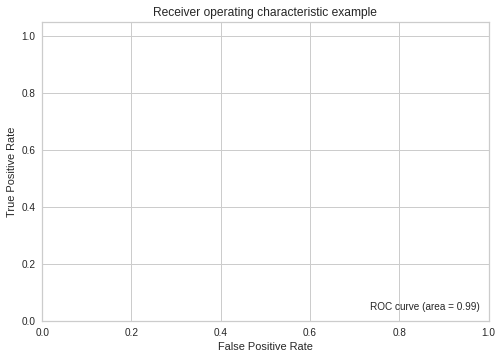

Accuracy: 0.98639, Cohen's Kappa Score: 0.97398
Confusion Matrix:
[[2432   22    0    0]
 [   1  772    3    1]
 [   0    4  264    1]
 [   6    9    3  157]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2454
           1       0.96      0.99      0.97       777
           2       0.98      0.98      0.98       269
           3       0.99      0.90      0.94       175

    accuracy                           0.99      3675
   macro avg       0.98      0.97      0.97      3675
weighted avg       0.99      0.99      0.99      3675



In [21]:

# Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
n_classes = y_train.shape[1]
y_test = label_binarize(y_test, classes=[0,1,2,3])
print(n_classes)
y_score = dtree.fit(X_train, y_train).predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 0
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1)) 

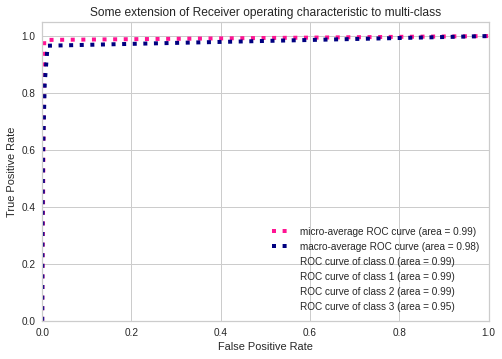

In [22]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Random forest

In [23]:


rf_entropy = RandomForestClassifier(criterion='entropy', max_depth= 7,n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_entropy.fit(X_train, y_train)
pred = rf_entropy.predict(X_test)
print('Criterion=entropy', metrics.accuracy_score(y_test, pred))



Criterion=entropy 0.9624489795918367


In [24]:
# importance = permutation_importance(rf_entropy, X_test, y_test)
# importance =importance.importances_mean
# importance = (importance-min(importance))/(max(importance)-min(importance))*100
# plt.figure(figsize=(20,10))
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# sns.barplot([x for x in range(len(importance))], importance)
# pyplot.show()



In [25]:
# from sklearn.metrics import roc_auc_score
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = rf_entropy.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, rf_entropy.fit(X_train, y_train).predict(X_test))   

4


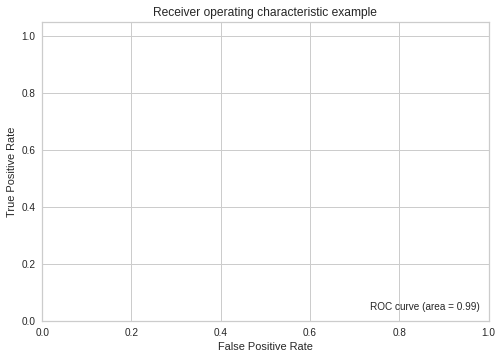

Accuracy: 0.96517, Cohen's Kappa Score: 0.85861
Confusion Matrix:
[[2427   27    0    0]
 [   1  776    0    0]
 [  25    7  237    0]
 [  49   16    3  107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2454
           1       0.94      1.00      0.97       777
           2       0.99      0.88      0.93       269
           3       1.00      0.61      0.76       175

    accuracy                           0.97      3675
   macro avg       0.97      0.87      0.91      3675
weighted avg       0.97      0.97      0.96      3675



In [26]:

# Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
n_classes = y_train.shape[1]
y_test = label_binarize(y_test, classes=[0,1,2,3])
print(n_classes)
y_score = rf_entropy.fit(X_train, y_train).predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 0
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))      

In [27]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


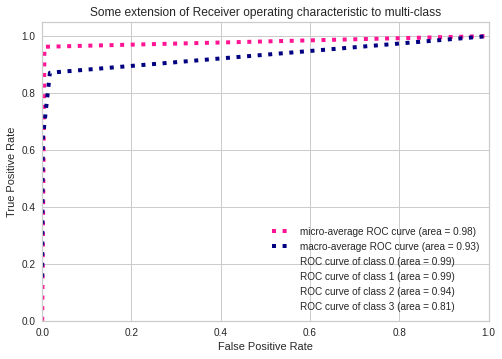

In [28]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [29]:
gbc= GradientBoostingClassifier( max_depth=7, min_samples_leaf=7,n_estimators = 100,random_state = 42)
                          
                          
                           
                           
gbc.fit(X_train, y_train.argmax(axis=1))
pred = gbc.predict(X_test)
print(pred.shape)
print('gbc', metrics.accuracy_score(y_test.argmax(axis=1), pred))

(3675,)
gbc 0.9951020408163266


In [30]:
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = gbc.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, gbc.fit(X_train, y_train).predict(X_test))

In [31]:
# importance = permutation_importance(gbc, X_test, y_test.argmax(axis=1))
# importance =importance.importances_mean
# importance = (importance-min(importance))/(max(importance)-min(importance))*100
# plt.figure(figsize=(20,10))
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# sns.barplot([x for x in range(len(importance))], importance)
# pyplot.show()

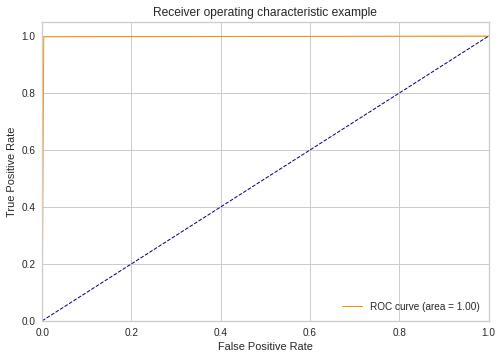

Accuracy: 0.99510, Cohen's Kappa Score: 0.98848
Confusion Matrix:
[[2451    3    0    0]
 [   2  775    0    0]
 [   0    2  267    0]
 [   3    5    3  164]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2454
           1       0.99      1.00      0.99       777
           2       0.99      0.99      0.99       269
           3       1.00      0.94      0.97       175

    accuracy                           1.00      3675
   macro avg       0.99      0.98      0.99      3675
weighted avg       1.00      1.00      1.00      3675



In [32]:
y_score =pred

# # Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
# n_classes = y_train.shape[1]
y_score = label_binarize(y_score, classes=[0,1,2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))   


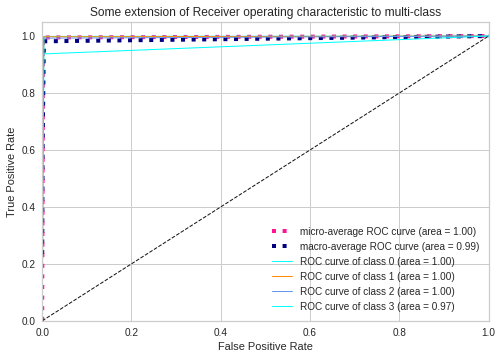

In [33]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Gaussian Naive Bayes

In [34]:
gnb = GaussianNB()
gnb.partial_fit( X_train,y_train.argmax(axis=1), np.unique(y_train.argmax(axis=1) ))
pred = gnb.predict(X_test)
print(pred.shape)
print('gnb', metrics.accuracy_score(y_test.argmax(axis=1), pred))


(3675,)
gnb 0.8797278911564625


In [35]:
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = gnb.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, gnb.fit(X_train, y_train).predict(X_test))

In [36]:
# importance = permutation_importance(gnb, X_test, y_test.argmax(axis=1))
# importance =importance.importances_mean
# importance = (importance-min(importance))/(max(importance)-min(importance))*100
# plt.figure(figsize=(20,10))
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# sns.barplot([x for x in range(len(importance))], importance)
# pyplot.show()


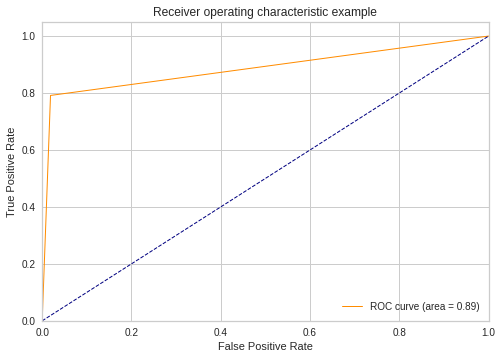

Accuracy: 0.87973, Cohen's Kappa Score: 0.82425
Confusion Matrix:
[[2338   35   60   21]
 [   2  615  144   16]
 [   0    3  256   10]
 [   0   16  135   24]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2454
           1       0.92      0.79      0.85       777
           2       0.43      0.95      0.59       269
           3       0.34      0.14      0.20       175

    accuracy                           0.88      3675
   macro avg       0.67      0.71      0.65      3675
weighted avg       0.91      0.88      0.88      3675



In [37]:
y_score =pred

# # Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
# n_classes = y_train.shape[1]
y_score = label_binarize(y_score, classes=[0,1,2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))   



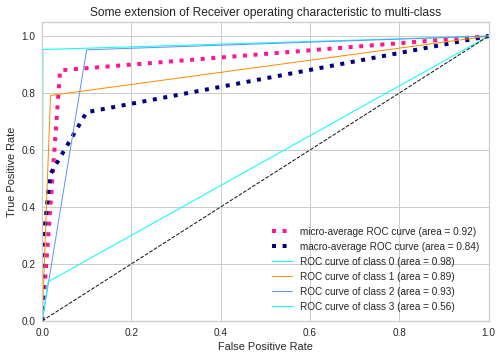

In [38]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### svm

In [ ]:
svm1 =OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=1))
                                  
svm1.fit(X_train, y_train)                                 
pred = svm1.predict(X_test)
print('svm', metrics.accuracy_score(y_test, pred))

In [ ]:
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = svm1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, svm1.fit(X_train, y_train).predict(X_test))

In [ ]:
# importance = permutation_importance(svm1, X_test, y_test)
# importance =importance.importances_mean
# importance = (importance-min(importance))/(max(importance)-min(importance))*100
# plt.figure(figsize=(20,10))
# print(importance.shape)
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# sns.barplot([x for x in range(len(importance))], importance)

# pyplot.show()


In [ ]:
y_score = svm1.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw =1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))   



In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50))
                                  
mlp.fit(X_train, y_train)                                 
pred = mlp.predict(X_test)
print('mlp', metrics.accuracy_score(y_test, pred))

NameError: name 'X_test' is not defined

In [ ]:
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = mlp.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, mlp.fit(X_train, y_train).predict(X_test))

In [ ]:
y_score=pred
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw =1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))   


In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Lightgbm Model Parameters and Training

In [ ]:


params = {'boosting_type': 'gbdt',
              'objective': 'multiclass',
              'metric':'multi_logloss',
              'num_leaves': 40,
              'learning_rate':0.01,
              'num_class':5,
              'feature_fraction': 0.9
              }


lgb_train = lgb.Dataset(X_train, y_train.argmax(axis=1))
lgb_eval = lgb.Dataset(X_test, y_test.argmax(axis=1), reference=lgb_train)
gbm = lgb.train(params,
    lgb_train,
    num_boost_round=2000,
    valid_sets=[lgb_train, lgb_eval],
    valid_names=['train','valid'],
   )



In [ ]:
feature_importance_df = pd.DataFrame()
y_pred_1=gbm.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [ ]:
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs =gbm.predict(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, y_pred_1)

In [ ]:
# x=gbm.feature_importance()
# y=pd.DataFrame(X_train)
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
# feature_imp = pd.DataFrame(sorted(zip(x,y)), columns=['Value','Feature'])
# feature_imp.iloc[:,0] = (feature_imp.iloc[:,0]-min(feature_imp.iloc[:,0]))/(max(feature_imp.iloc[:,0])-min(feature_imp.iloc[:,0]))*100
# print(feature_imp.iloc[:,:2])

# plt.figure(figsize=(20, 10))
# sns.barplot(y="Value", x="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.title('LightGBM Features (avg over folds)')
# plt.tight_layout()
# plt.show()
# # plt.savefig('images/case-1/lgbm_importances-01.png')



In [ ]:
y_score =y_pred_1

# # Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
# n_classes = y_train.shape[1]
y_score = label_binarize(y_score, classes=[0,1,2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))   

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### XGBoost

In [ ]:

classes=[0,1,2,3]
df_k=df.drop(['DRUGDAYS'],axis=1)
all_feat=train.columns
print(all_feat)
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train.argmax(axis=1))
predict_fn_xgb = lambda x: model_xgb.predict_proba(x).astype(float)
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train,mode='classification',feature_selection= 'auto',
#                                                    class_names=classes,feature_names = all_feat, 
#                                                    kernel_width=None,discretize_continuous=True)

In [ ]:
pred =model_xgb.predict(X_test)
print('model_xgb', metrics.accuracy_score(y_test.argmax(axis=1), pred))
pred.shape

In [ ]:
# from sklearn.metrics import roc_auc_score
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = model_xgb.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, model_xgb.fit(X_train, y_train).predict(X_test))  

In [ ]:
y_score =pred

# # Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
# n_classes = y_train.shape[1]
y_score = label_binarize(y_score, classes=[0,1,2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))  



In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# importance = permutation_importance(model_xgb, X_test, y_test.argmax(axis=1))
# importance =importance.importances_mean
# importance = (importance-min(importance))/(max(importance)-min(importance))*100
# plt.figure(figsize=(20,10))
# print(importance.shape)
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# sns.barplot([x for x in range(len(importance))], importance)
# pyplot.show()



###  Discriminant Analysis Essentials

In [ ]:
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train.argmax(axis=1))                                 
pred = ld.predict(X_test)
print('logit', metrics.accuracy_score(y_test.argmax(axis=1), pred))

In [ ]:
# from sklearn.metrics import roc_auc_score
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = ld.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, ld.fit(X_train, y_train).predict(X_test))   

In [ ]:
y_score =pred

# # Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
# n_classes = y_train.shape[1]
y_score = label_binarize(y_score, classes=[0,1,2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))  


In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### logistic regression 

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train.argmax(axis=1))                                 
pred = logit.predict(X_test)
print('logit', metrics.accuracy_score(y_test.argmax(axis=1), pred))

In [ ]:
# from sklearn.metrics import roc_auc_score
# ns_probs = [0 for _ in range(len(y_test))]
# # predict probabilities
# lr_probs = logit.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()
# print_stats(y_test, logit.fit(X_train, y_train).predict(X_test))   

In [ ]:
y_score =pred

# # Binarize the output
y_train = label_binarize(y_train, classes=[0,1,2,3])
# n_classes = y_train.shape[1]
y_score = label_binarize(y_score, classes=[0,1,2,3])


fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print_stats(y_test.argmax(axis=1), y_score.argmax(axis=1))  



In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
